In [2]:
import uproot
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [3]:
def PtEtaPhiToX(pt,eta,phi):
    return(pt * np.cos(phi))
    
def PtEtaPhiToY(pt,eta,phi):
    return(pt * np.sin(phi))

def PtEtaPhiToZ(pt,eta,phi):
    return(pt * np.sinh(eta))

In [4]:
def XYZToP(px,py,pz):
    return(np.sqrt(px**2 + py**2 + pz**2))
    
def XYZToTheta(px,py,pz):
    return(np.arccos(pz/XYZToP(px,py,pz)))

def XYZToPhi(px,py,pz):
    return(np.arctan(py/px))

In [5]:
def generate_figs(TTree):
    #get information of all particles
    part_px = TTree["Particle/Particle.Px"].array()
    part_py = TTree["Particle/Particle.Py"].array()
    part_pz = TTree["Particle/Particle.Pz"].array()

    part_energy = TTree["Particle/Particle.E"].array()
    part_mass = TTree["Particle/Particle.Mass"].array()

    part_status = TTree["Particle.Status"].array()
    
    #extract final state particles
    
    final_px = part_px[part_status == 1]
    final_py = part_py[part_status == 1]
    final_pz = part_pz[part_status == 1]

    final_e = part_energy[part_status == 1]
    final_m = part_mass[part_status == 1]
    
    #convert x, y, z to p, theta, phi
    final_absP=XYZToP(final_px,final_py,final_pz)
    final_theta=XYZToTheta(final_px,final_py,final_pz)
    final_Phi=XYZToPhi(final_px,final_py,final_pz)
    
    #generate figs event by event
    figs = []
    for evt in tqdm(range(100000)):
        bins = (64,64)
        A = np.array(np.array([np.array(final_absP[evt]),np.array(final_theta[evt]),np.array(np.array(final_Phi[evt]))]))
        thetas = A[2]
        phis = A[1]
        energies = A[0]   
        center = [np.average(thetas, weights=energies), np.average(phis,weights=energies)]
        range_fig=[[center[0]-np.pi, center[0]+np.pi ],[center[1]-np.pi/2,center[1]+np.pi/2]]
        histo, xedges, yedges =  np.histogram2d(thetas-center[0], phis-center[1], bins=bins, weights=A[0], range=range_fig)
        figs.append(histo)
    
        # A: [p,theta,phi]
    
    return(np.array(figs))

In [6]:
def generate_figs(TTree):
    #get information of all particles
    part_px = TTree["Particle/Particle.Px"].array()
    part_py = TTree["Particle/Particle.Py"].array()
    part_pz = TTree["Particle/Particle.Pz"].array()

    part_energy = TTree["Particle/Particle.E"].array()
    part_mass = TTree["Particle/Particle.Mass"].array()

    part_status = TTree["Particle.Status"].array()
    
    #extract final state particles
    
    final_px = part_px[part_status == 1]
    final_py = part_py[part_status == 1]
    final_pz = part_pz[part_status == 1]

    final_e = part_energy[part_status == 1]
    final_m = part_mass[part_status == 1]
    
    #convert x, y, z to p, theta, phi
    final_absP=XYZToP(final_px,final_py,final_pz)
    final_theta=XYZToTheta(final_px,final_py,final_pz)
    final_Phi=XYZToPhi(final_px,final_py,final_pz)
    
    #get information of all jets
    jets_btag = TTree["Jet/Jet.BTag"].array()
    
    #evaluate Nb
    nbm = np.sum(jets_btag,axis=1)
    
    #generate figs event by event
    figs = []
    for evt in tqdm(range(100000)):
        bins = (64,64)
        A = np.array(np.array([np.array(final_absP[evt]),np.array(final_theta[evt]),np.array(np.array(final_Phi[evt]))]))
        thetas = A[2]
        phis = A[1]
        energies = A[0]   
        center = [np.average(thetas, weights=energies), np.average(phis,weights=energies)]
        range_fig=[[center[0]-np.pi, center[0]+np.pi ],[center[1]-np.pi/2,center[1]+np.pi/2]]
        histo, xedges, yedges =  np.histogram2d(thetas-center[0], phis-center[1], bins=bins, weights=A[0], range=range_fig)
        figs.append([histo,nbm[evt]])
    
        # A: [p,theta,phi]
    
    return(np.array(figs))

In [7]:
dijet = uproot.open("./jj_inclusive.root")
tttt  = uproot.open("./tttt.root")

In [8]:
TTree_dijet = dijet["Delphes"]
TTree_tttt  = tttt["Delphes"]

In [9]:
figs_dijet = generate_figs(TTree_dijet)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:28<00:00, 1132.75it/s]
/var/folders/s1/5899n4dn09757b61s53dcg_r0000gn/T/ipykernel_60386/1329506419.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.array(figs))


In [10]:
figs_tttt = generate_figs(TTree_tttt)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:22<00:00, 1210.01it/s]
/var/folders/s1/5899n4dn09757b61s53dcg_r0000gn/T/ipykernel_60386/1329506419.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.array(figs))


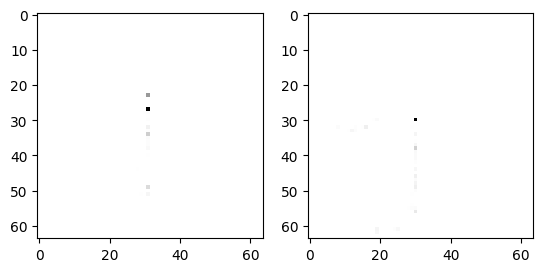

In [11]:
a = int(np.random.rand(1)*100000)
plt.subplot(1,2,1)
plt.imshow(figs_dijet[a][0], cmap=cm.gray_r)
plt.subplot(1,2,2)
plt.imshow(figs_tttt[a][0], cmap=cm.gray_r)

In [12]:
np.save("./tttt_nbm",figs_tttt)

In [13]:
np.save("./jj_nbm",figs_dijet)